# Your name: Caroline Otten
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [2]:
# import packages 
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 
import matplotlib.pyplot as plt

# Data File Reading Section
## Write code to read in data from external sources here

In [4]:
#read datasets
df = pd.read_csv('/content/data.csv', encoding='cp1252')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [5]:
df.describe
df.shape
df.count
df.isnull().sum()
df.info
df.head(10)
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [6]:
# Cleaning up the data

#dropping columns that aren't required

# ... your code here
labels = ['stn_code', 'agency', 'sampling_date', 'location_monitoring_station']
df.drop(labels, axis = 1)

# dropping rows where no date is available

# ... your code here
df.dropna(axis = 0, how = 'all')

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# displaying final columns (data.columns)

# ... your code here
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [8]:
# ... Your code here
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }

df.type = df.type.replace(types)

In [9]:
# Display top 10 records after codification of 'types'
df.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,RRO,5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,I,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,RRO,4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,I,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [10]:
# ... Your code here
df['date'] = pd.to_datetime(df['date'])

df['year'] = pd.DatetimeIndex(df['date']).year

### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [11]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset

# ... your code here
COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[COLS] = imputer.fit_transform(df[COLS]) 

df.info
df.isnull

<bound method DataFrame.isnull of        stn_code       sampling_date  ...       date    year
0           150  February - M021990  ... 1990-02-01  1990.0
1           151  February - M021990  ... 1990-02-01  1990.0
2           152  February - M021990  ... 1990-02-01  1990.0
3           150     March - M031990  ... 1990-03-01  1990.0
4           151     March - M031990  ... 1990-03-01  1990.0
...         ...                 ...  ...        ...     ...
435737     SAMP            24-12-15  ... 2015-12-24  2015.0
435738     SAMP            29-12-15  ... 2015-12-29  2015.0
435739      NaN                 NaN  ...        NaT     NaN
435740      NaN                 NaN  ...        NaT     NaN
435741      NaN                 NaN  ...        NaT     NaN

[435742 rows x 14 columns]>

## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


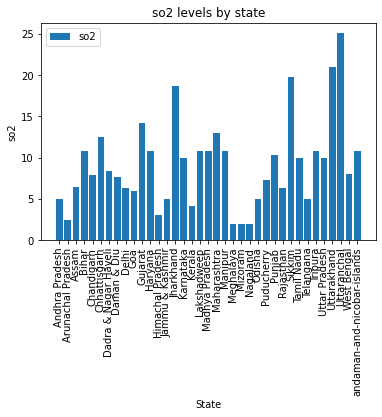

In [12]:
# ... Your code here
median_values = df.groupby('state')['so2', 'no2', 'rspm', 'spm'].agg('median').sort_values(by = 'state')

plt.bar((median_values.index), (median_values.so2), label = 'so2')
plt.title('so2 levels by state')
plt.xlabel('State')
plt.ylabel('so2')
plt.legend()
plt.xticks(rotation=90)

plt.show()

### no2 status

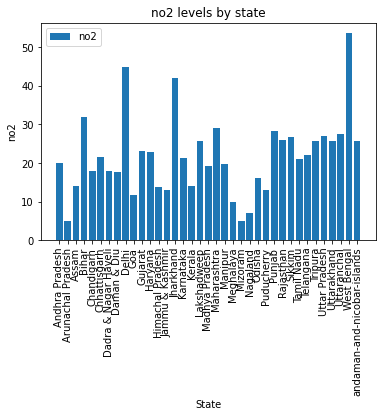

In [ ]:
# ... Your code here
plt.bar((median_values.index), (median_values.no2), label = 'no2')
plt.title('no2 levels by state')
plt.xlabel('State')
plt.ylabel('no2')
plt.legend()
plt.xticks(rotation=90)

plt.show()

### rspm status

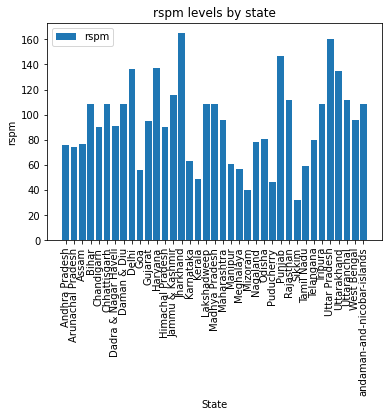

In [ ]:
# ... Your code here
plt.bar((median_values.index), (median_values.rspm), label = 'rspm')
plt.title('rspm levels by state')
plt.xlabel('State')
plt.ylabel('rspm')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### spm status

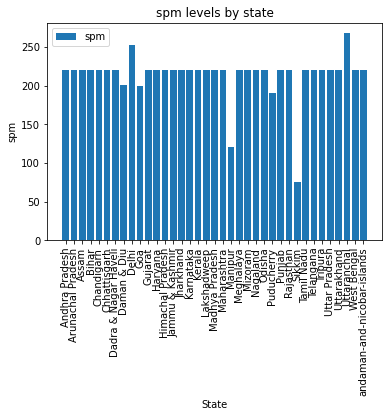

In [ ]:
# ... Your code here
plt.bar((median_values.index), (median_values.spm), label = 'spm')
plt.title('spm levels by state')
plt.xlabel('State')
plt.ylabel('spm')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [17]:
# ... Your code here
state_slice = df[df.state == 'Andhra Pradesh']
df3 = state_slice.groupby('year')['so2', 'no2', 'rspm', 'spm'].median()
df3.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,so2,no2,rspm,spm
year,,,,
1990.0,5.60,13.6,108.832784,179.00000
1991.0,8.25,12.8,108.832784,141.50000
1992.0,12.40,27.6,108.832784,192.00000
1993.0,6.00,11.4,108.832784,220.78348
1994.0,8.70,14.2,108.832784,220.78348


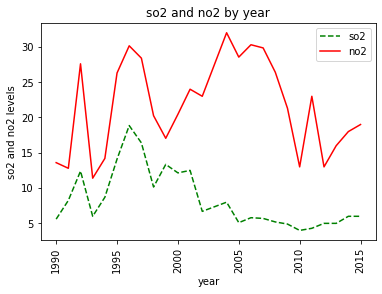

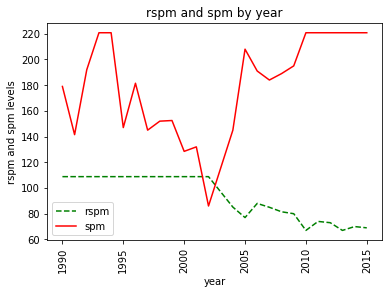

In [20]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.

# ... Your code here
plt.plot(df3.index, df3.so2, color='g', linestyle='--',  label = 'so2')
plt.plot(df3.index, df3.no2, color='r', linestyle='-', label = 'no2')
plt.legend()
plt.title('so2 and no2 by year')
plt.xlabel('year')
plt.ylabel('so2 and no2 levels')
plt.xticks(rotation=90)
plt.show()

plt.plot(df3.index, df3.rspm , color='g', linestyle='--', label = 'rspm')
plt.plot(df3.index, df3.spm, color='r', linestyle='-', label = 'spm')
plt.legend()
plt.title('rspm and spm by year')
plt.xlabel('year')
plt.ylabel('rspm and spm levels')
plt.xticks(rotation=90)
plt.show()

Do you find anythumg alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



no2 and spm have historically seem to be much higher than rspm and so2 levels. 